<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#实验目的" data-toc-modified-id="实验目的-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>实验目的</a></span></li><li><span><a href="#实验过程" data-toc-modified-id="实验过程-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>实验过程</a></span><ul class="toc-item"><li><span><a href="#查看数据" data-toc-modified-id="查看数据-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>查看数据</a></span><ul class="toc-item"><li><span><a href="#数据分析" data-toc-modified-id="数据分析-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>数据分析</a></span></li><li><span><a href="#sklearn.linear_model-简单划分" data-toc-modified-id="sklearn.linear_model-简单划分-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>sklearn.linear_model 简单划分</a></span></li></ul></li><li><span><a href="#构建神经网络" data-toc-modified-id="构建神经网络-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>构建神经网络</a></span><ul class="toc-item"><li><span><a href="#理论基础" data-toc-modified-id="理论基础-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>理论基础</a></span></li></ul></li><li><span><a href="#训练模型" data-toc-modified-id="训练模型-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>训练模型</a></span></li><li><span><a href="#测试" data-toc-modified-id="测试-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>测试</a></span></li><li><span><a href="#得出结论" data-toc-modified-id="得出结论-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>得出结论</a></span></li><li><span><a href="#测试不同隐藏层数的效果" data-toc-modified-id="测试不同隐藏层数的效果-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>测试不同隐藏层数的效果</a></span></li></ul></li></ul></div>

# 实验目的
手动实现带有一个隐藏层的神经网络，神经网络结构如下
![](2018032619555133.png)

实验内容
- 构建具有单隐藏层的2类分类神经网络。
- 使用具有非线性激活功能激活函数，例如tanh。
- 计算交叉熵损失（损失函数）。
- 实现向前和向后传播。

# 实验过程

In [40]:
import numpy as np 
import pandas as pd
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib.pyplot as plt
import sys

from testCases import *
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline 
np.random.seed(1) 

## 查看数据

In [21]:
X, Y = load_planar_dataset()

In [22]:
# 查看数据
print(X, Y)

[[ 1.20444229e+00  1.58709904e-01  9.52471960e-02  3.49178475e-01
   6.94150378e-01  1.62065038e+00  1.53856225e+00  3.63085641e-02
   4.74591109e-01  1.65695828e-01  1.66446249e+00  8.40285720e-01
   2.61695163e-01  2.31614896e-01  1.58013020e+00  6.35509950e-03
   6.80610419e-01  1.21400432e-01  1.13281261e+00  1.61505892e+00
   1.66454441e-01  1.72438241e+00  1.88667246e+00  1.72327227e+00
   1.54661332e+00  9.84590400e-01  1.45313345e+00  7.49043388e-01
   1.45048341e+00  1.64287865e+00  1.28141487e+00  1.59574104e+00
   1.46298294e+00  1.46629048e+00  1.54348961e+00  1.57013416e+00
   1.22995404e+00  1.31142345e+00 -1.99364553e+00  3.94564752e-01
   1.51715449e+00  1.69169139e+00  1.74186686e+00 -2.91373382e+00
   7.52150898e-01  1.68537303e+00  3.71160238e-01 -3.73033884e+00
   3.52484080e-01 -1.48694206e+00 -7.45290416e-01  5.63807442e-01
   1.27093179e+00  5.35133607e-01 -1.71330375e-01 -2.50197293e+00
  -2.63275448e+00 -3.15561550e+00 -2.11022490e+00 -3.51303563e+00
  -3.52018

In [23]:
# 使用matplotlib 绘制图形，显示更加直观
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral)

### 数据分析
通过图像能够明显的看出，这个数据集中的数据是线性不可分数据集，使用简单的线性模型是不能够将其划分开来的。
通过构造一层的简单神经网络希望能够得到较好的结果。

In [24]:
# 查看数据信息
print("X.shape ", X.shape)
print("Y.shape ", Y.shape)

X.shape  (2, 400)
Y.shape  (1, 400)


### sklearn.linear_model 简单划分

In [25]:
# 使用的是LogisticRegressionCV 模型，并进行训练
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X.T, Y.T)

D:\Program Files (x86)\Anaconda3\envs\tf2\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegressionCV()

In [26]:
# 预测运算结果
plot_decision_boundary(lambda x : clf.predict(x), X, Y)
plt.title("Logistic Regression")
LR_predictions = clf.predict(X.T) 

score = (np.dot(Y, LR_predictions) + np.dot(1 - Y,1 - LR_predictions)) / float(Y.size) * 100
print("score = ", score)

score =  [47.]


从图形中我们也能够看出，逻辑回归模型效果确实不佳，简单的线性模型是不能解决这问题的。接下来就实现一个带有隐藏层的神经网络解决这个二分类问题。

## 构建神经网络

神经网络结构如下
<img src="2018032619555133.png" width="60%">

### 理论基础
- 向前算法迭代公式：
$$
z^{[1](i)} = w^{([1](i))}x + b^{[1](i)} \\
a^{[1](i)} = g(z^{[1](1)}) \\
g(z) = \frac{1}{1+e^{-z}} \\ 
z^{[2](i)} = w^{([2](i))}a^{[1](i)} + b^{[2](i)} \\
a^{[2](i)} = g(z^{[2](1)}) 
$$

- 计算损失函数
$$
J = -\frac{1}{m} \left\{ y^{(i)}log(a^{[2](i)}) + [1-y^{(i)}log(1-a^{[2](i)})] \right\}
$$

- 神经网络计算过程
    - 前向传播计算预测
    - 计算损失函数
    - 后向传播进行参数更新
    - 梯度下降更新参数

In [27]:
def layer_sizes(X, Y, n_h = 4):
    '''
    function:
        定义各层节点个数 
    '''
    n_x = X.shape[0]
    n_y = Y.shape[0]
    
    return (n_x, n_h, n_y)

In [28]:
def initialize_parameters(n_x, n_h, n_y):
    '''
    function:
        初始化参数 
    '''
    np.random.seed(2)
    W1 = np.random.randn(n_h, n_x)*0.01 
    b1 = np.random.randn(n_h, 1)
    W2 = np.random.randn(n_y, n_h)*0.01 
    b2 = np.random.randn(n_y, 1)
    
    assert(W1.shape == (n_h, n_x))
    assert(b1.shape == (n_h, 1))
    assert(W2.shape == (n_y, n_h))
    assert(b2.shape == (n_y, 1))
    
    parameters = {
        'W1':W1, 
        'b1':b1, 
        'W2':W2, 
        'b2':b2
    }
    
    return parameters

In [44]:
def forward_propagation(X, parament):
    '''
    function:
        实现前向计算 
    '''
    W1 = parament['W1']
    b1 = parament['b1']
    W2 = parament['W2']
    b2 = parament['b2']
    
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = np.tanh(Z2) 
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache  = {
        'Z1':Z1,
        'A1':A1,
        'Z2':Z2,
        'A2':A2
    }
    return cache

In [30]:
def compute_cost(A2, Y, parameters):
    '''
    function:
        计算损失函数 
    '''
    m = Y.shape[1]
    logprobs = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2))
    cost = - np.sum(logprobs) / m
    cost = float(np.squeeze(cost))
    
    return cost 

In [31]:
def backward_propagation(parameters, cache, X, Y):
    m = Y.shape[1]
    W2 = parameters['W2']
    A1 = cache['A1']
    A2 = cache['A2']
    
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m 
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m 
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
    dW1 = np.dot(dZ1, X.T) / m 
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m 
    
    grads = {
        'dW1':dW1,
        'db1':db1,
        'dW2':dW2,
        'db2':db2,
    }
    return grads

In [32]:
def update_parameters(parameters, grad, learding_rate=1.2):
    W1, b1, W2, b2 = parameters['W1'], parameters['b1'], parameters['W2'], parameters['b2']
    dW1, dW2, db1, db2 = grad['dW1'], grad['dW2'], grad['db1'], grad['db2']
    
    W1 = W1 - learding_rate * dW1
    b1 = b1 - learding_rate * db1
    W2 = W2 - learding_rate * dW2
    b2 = b2 - learding_rate * db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    return parameters

In [33]:
def nn_model(X, Y, n_h, num_iterations, print_cost=False):
    np.random.seed(3)
    n_x,_,n_y = layer_sizes(X, Y)
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1, b1, W2, b2 = parameters['W1'], parameters['b1'], parameters['W2'], parameters['b2']
    
    for i in range(num_iterations):
        cache = forward_propagation(X, parameters)
        cost = compute_cost(np.squeeze(cache['A2']), Y, parameters)
        gards = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, gards, learding_rate=0.5)
        
        if print_cost and (i%1000 == 0):
            print("N.", i, " cost = ", cost)
        
    return parameters

## 训练模型

In [34]:
#测试nn_model
X_assess, Y_assess = nn_model_test_case()

parameters = nn_model(X_assess, Y_assess, 4, num_iterations=10000, print_cost=True)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

N. 0  cost =  2.0765207304454574
N. 1000  cost =  -inf


D:\Program Files (x86)\Anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys
D:\Program Files (x86)\Anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
D:\Program Files (x86)\Anaconda3\envs\tf2\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


N. 2000  cost =  nan
N. 3000  cost =  nan
N. 4000  cost =  nan
N. 5000  cost =  nan
N. 6000  cost =  -inf
N. 7000  cost =  nan
N. 8000  cost =  nan
N. 9000  cost =  -inf
W1 = [[-25844.89577062 -36628.12314712]
 [-25331.75634131 -35893.92948233]
 [-25865.30319023 -36674.27335388]
 [-25452.25281643 -36078.89951826]]
b1 = [[2691.72715516]
 [2630.35403903]
 [2674.59019619]
 [2625.52645642]]
W2 = [[3.85520905 3.59642698 4.30580097 4.66175976]]
b2 = [[-33.41493633]]


In [35]:
def predict(parameters,X):
    """
    使用学习的参数，为X中的每个示例预测一个类
    
    参数：
        parameters - 包含参数的字典类型的变量。
        X - 输入数据（n_x，m）
    
    返回
    predictions - 我们模型预测的向量（红色：0 /蓝色：1）
     
     """
    cache = forward_propagation(X,parameters)
    predictions = np.round(cache['A2'])
    
    return predictions


In [36]:
#测试predict
print("=========================测试predict=========================")

parameters, X_assess = predict_test_case()

predictions = predict(parameters, X_assess)
print("预测的平均值 = " + str(np.mean(predictions)))


=========================测试predict=========================
预测的平均值 = 1.0


## 测试

## 得出结论

In [37]:
parameters = nn_model(X, Y, n_h = 4, num_iterations=10000, print_cost=True)

#绘制边界
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

predictions = predict(parameters, X)
print ('准确率: %d' % float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100) + '%')

N. 0  cost =  1.8391355621157681


D:\Program Files (x86)\Anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys


N. 1000  cost =  nan
N. 2000  cost =  nan
N. 3000  cost =  nan
N. 4000  cost =  nan
N. 5000  cost =  nan
N. 6000  cost =  nan
N. 7000  cost =  nan
N. 8000  cost =  nan
N. 9000  cost =  nan
准确率: 59%


## 测试不同隐藏层数的效果

D:\Program Files (x86)\Anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys


隐藏层的节点数量： 0  ，准确率: 50.0 %
隐藏层的节点数量： 1  ，准确率: 61.25000000000001 %
隐藏层的节点数量： 2  ，准确率: 60.75000000000001 %
隐藏层的节点数量： 3  ，准确率: 72.25 %
隐藏层的节点数量： 4  ，准确率: 76.0 %
隐藏层的节点数量： 5  ，准确率: 86.75 %
隐藏层的节点数量： 20  ，准确率: 86.5 %
隐藏层的节点数量： 50  ，准确率: 89.5 %


D:\Program Files (x86)\Anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
D:\Program Files (x86)\Anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys


隐藏层的节点数量： 100  ，准确率: 87.25 %


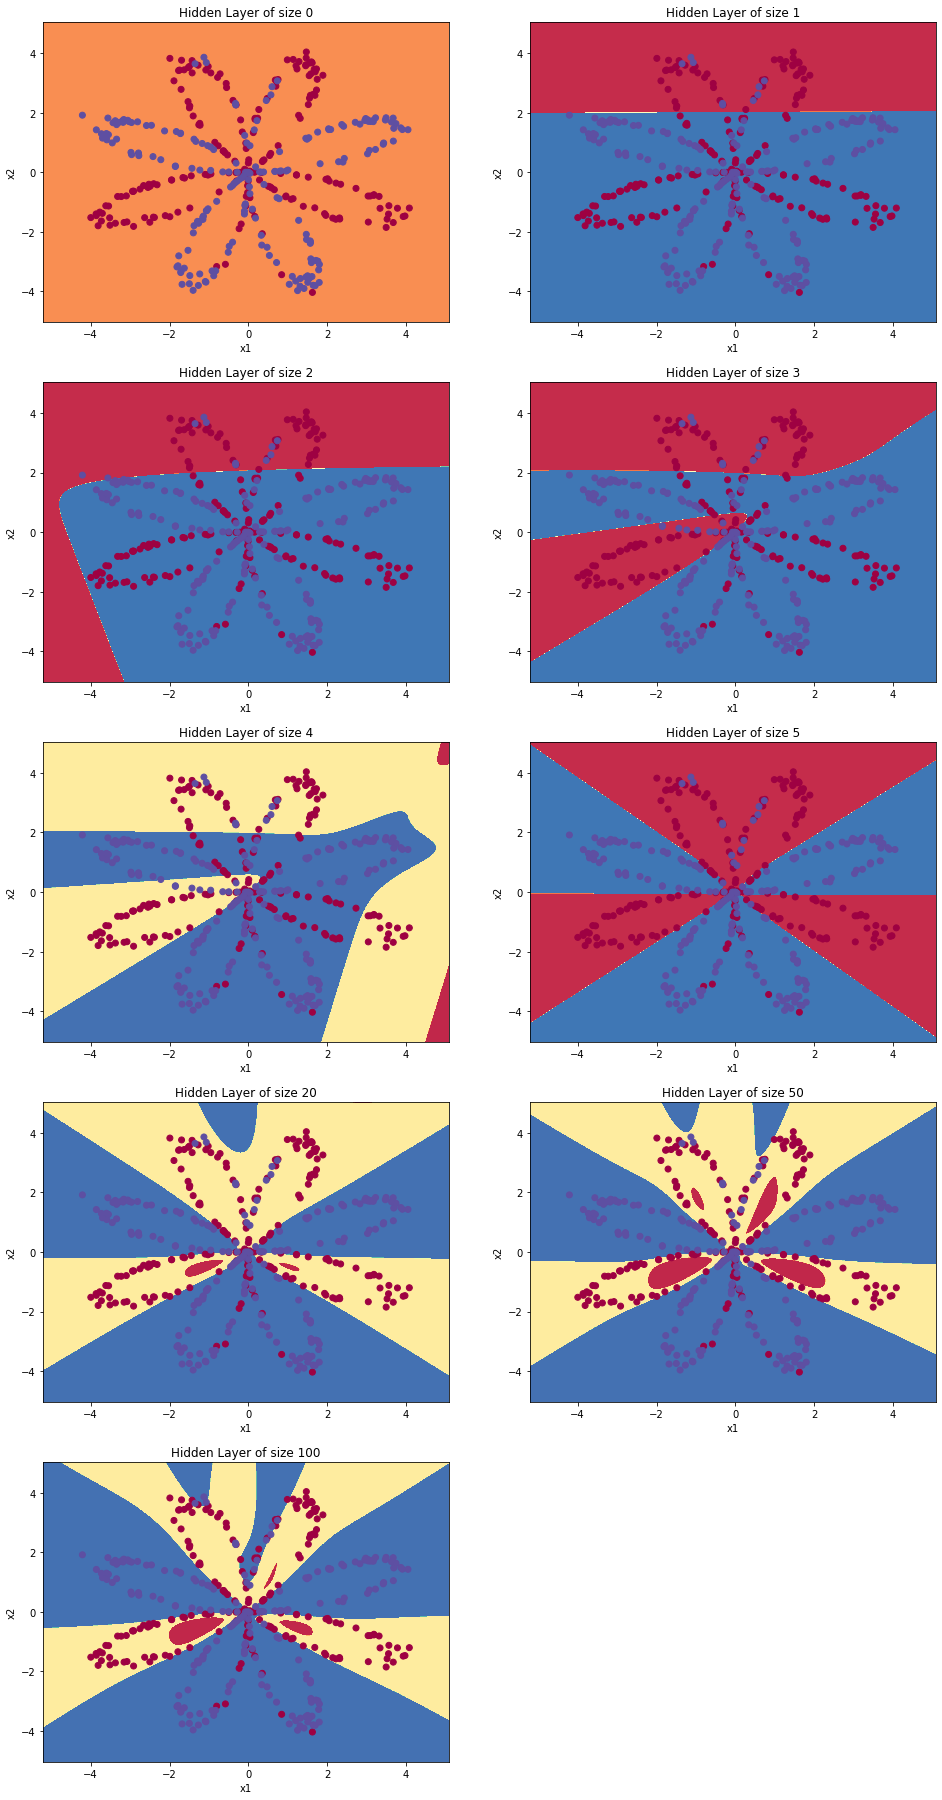

In [45]:
plt.figure(figsize=(16, 32))
hidden_layer_sizes = [0, 1, 2, 3, 4, 5, 20, 50, 100] #隐藏层数量
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i + 1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations=5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100)
    print ("隐藏层的节点数量： {}  ，准确率: {} %".format(n_h, accuracy))